In [51]:
from scipy import ndimage

import matplotlib.pyplot as plt
import numpy as np
from pylab import imread
real_pandas = imread('panda-mania-12.png')
plt.imshow(real_pandas)
#plt.imshow(real_pandas)

In [2]:
real_pandas

array([[[ 0.17647059,  0.29803923,  0.13725491],
        [ 0.25098041,  0.38431373,  0.18431373],
        [ 0.24705882,  0.39607844,  0.17254902],
        ..., 
        [ 0.15294118,  0.24313726,  0.07843138],
        [ 0.2       ,  0.27058825,  0.11372549],
        [ 0.17647059,  0.26666668,  0.08627451]],

       [[ 0.21960784,  0.34901962,  0.17254902],
        [ 0.26274511,  0.39607844,  0.2       ],
        [ 0.27058825,  0.40784314,  0.1882353 ],
        ..., 
        [ 0.20784314,  0.32156864,  0.14901961],
        [ 0.2       ,  0.35294119,  0.12941177],
        [ 0.23921569,  0.38039216,  0.12941177]],

       [[ 0.23529412,  0.3882353 ,  0.18039216],
        [ 0.27450982,  0.42745098,  0.21176471],
        [ 0.28627452,  0.43529412,  0.20392157],
        ..., 
        [ 0.27450982,  0.48627451,  0.11764706],
        [ 0.34117648,  0.49019608,  0.15686275],
        [ 0.25490198,  0.42745098,  0.11764706]],

       ..., 
       [[ 0.01960784,  0.03137255,  0.00392157],
        

In [4]:
test = np.mean(real_pandas,axis=2)
median = np.median(test)
#test < median


In [38]:
def convert_to_grayscale(image, crop_left, crop_top, crop_right, crop_bottom, contrast_scale):
    
    image2 = image[int(crop_top): len(image) - int(crop_bottom),int(crop_left):len(image[0])- int(crop_right),:]
    gray_scale = np.mean(image2,axis=2)
    median = np.median(gray_scale)
    gray_scale_adjdown = gray_scale.copy()
    gray_scale_adjdown[gray_scale_adjdown>=median] = 0
    gray_scale_adjdown = gray_scale_adjdown - ((contrast_scale)*gray_scale_adjdown) 
    gray_scale_adjup = gray_scale.copy()
    gray_scale_adjup[gray_scale_adjup<=median] = 0
    gray_scale_adjup = gray_scale_adjup + ((contrast_scale)*gray_scale_adjup)
    gray_scale_adjnon = gray_scale.copy()
    gray_scale_adjnon[gray_scale_adjnon != median] = 0
    contrast = gray_scale_adjup + gray_scale_adjnon + gray_scale_adjdown
    
    #for i in range(0,len(gray_scale)):
    #    for j in range(0,len(gray_scale[0])):
    #         if gray_scale[i][j] < median:
    #              gray_scale[i][j] = gray_scale[i][j] - (contrast_scale/100)*gray_scale[i][j]
    contrast[contrast < 0] = 0
    contrast[contrast > 1] = 1
    
    return contrast
        

## Step 4

In [55]:
data = imread('data-behind-everything.png')

In [56]:

gray_data = convert_to_grayscale(data, 10, 50, 10, 50, 0.3)


In [57]:
gray_data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

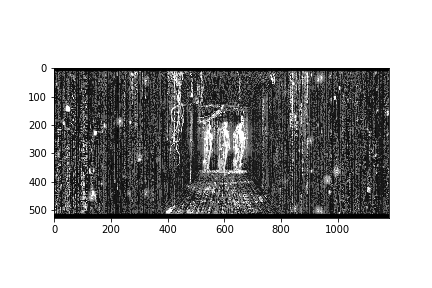

In [58]:
plt.imshow(gray_data, cmap=plt.cm.gray)
plt.savefig('gray_data.png')
from IPython.display import Image 
Image(filename='gray_data.png')